In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [62]:
# Read an image
img_path = "../images/"
img_name = "lines_3.jpg"
img = cv.imread(img_path + img_name, cv.IMREAD_GRAYSCALE)
cv.imwrite(img_path + img_name.rpartition('.')[0] + '_gray.jpg', img)

True

(-0.5, 1199.5, 799.5, -0.5)

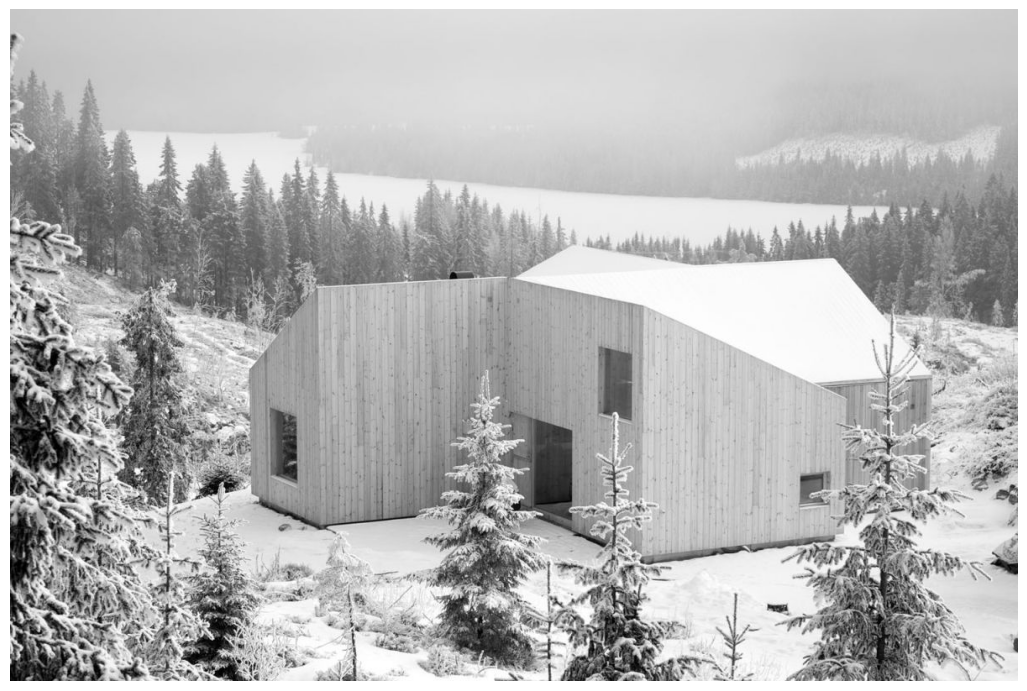

In [63]:
# Show image
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

True

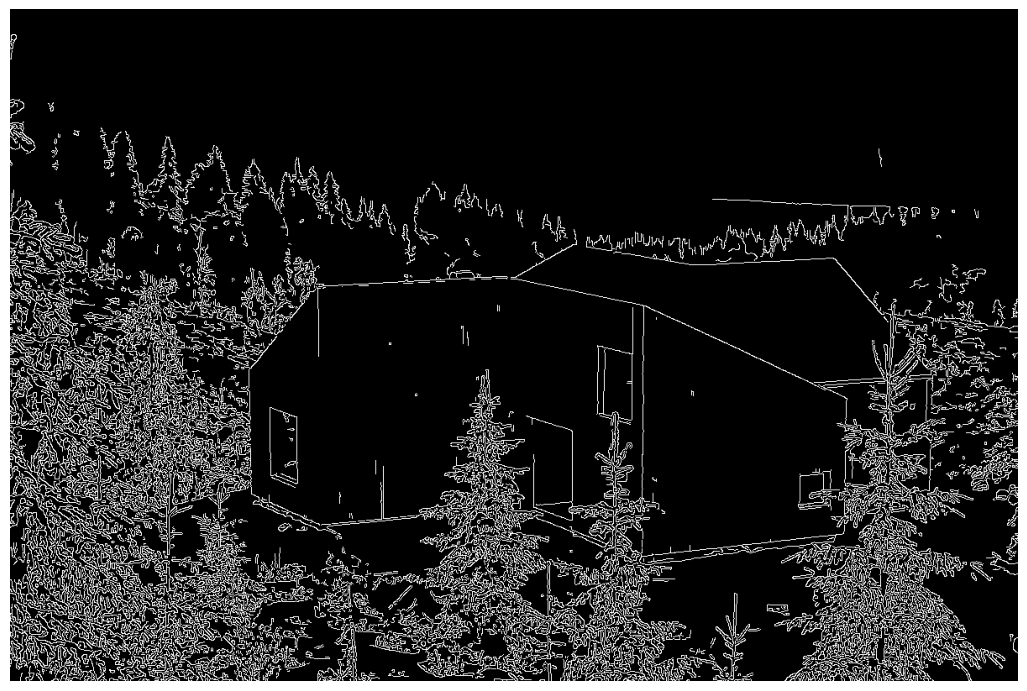

In [64]:
# Apply Canny algorithm
img_edge = cv.Canny(img, 100, 200, None, 3, L2gradient=True)
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img_edge, cv.COLOR_BGR2RGB))
plt.axis('off')
cv.imwrite(img_path + img_name.rpartition('.')[0] + '_canny.jpg', img_edge)

In [288]:
print(img_edge.shape)
# Reduce the size of img_egde
n_rows, n_cols = img_edge.shape[:2]
x_scale = 0.3
y_scale = 0.3
img_edge = cv.resize(img_edge, (int(n_cols * x_scale), int(n_rows * y_scale)), interpolation=cv.INTER_CUBIC)
print(img_edge.shape)

(800, 1200)
(240, 360)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


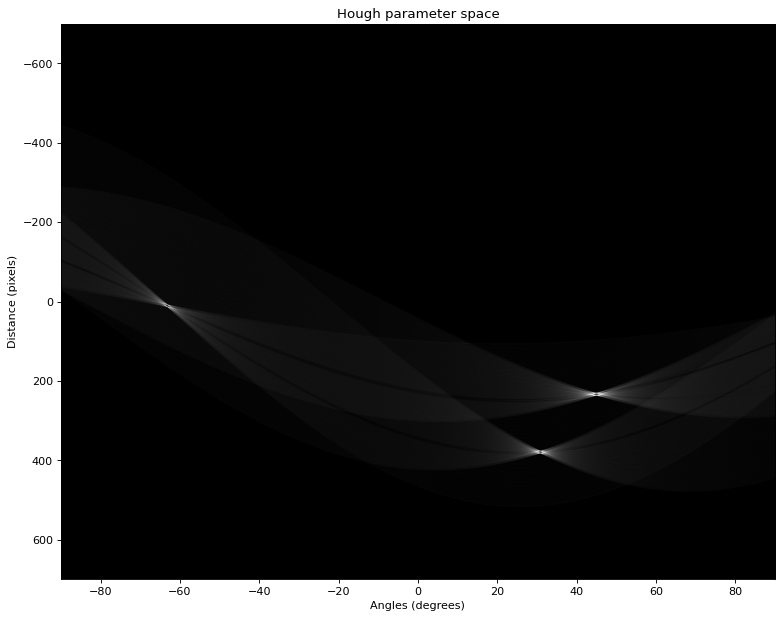

In [38]:
# Displaying the Hough transform parameter space
angle_step_factor = 0.1
angles = np.linspace(-np.pi / 2, np.pi / 2, int(round(360 / angle_step_factor)), endpoint=False)
img_h, theta, rho = skimage.transform.hough_line(img_edge, theta=angles)

# Visualize
fig = plt.figure(figsize=(13, 9), dpi=80)
angle_step = 0.5 * np.diff(theta).mean()
dist_step = 0.5 * np.diff(rho).mean()
bounds = [np.rad2deg(theta[0] - angle_step), np.rad2deg(theta[-1] + angle_step), rho[-1] + dist_step, rho[0] - dist_step]

plt.imshow(cv.cvtColor(np.float32(3.0 * img_h / np.max(img_h)), cv.COLOR_GRAY2RGB), extent=bounds, aspect=0.1)
plt.title('Hough parameter space')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance (pixels)')
plt.show()

fig.savefig(img_path + img_name.rpartition('.')[0] + "_param_space.jpg")

In [91]:
# Apply progressive probabilistic Hough transform for finding lines
lines_prob = cv.HoughLinesP(image=img_edge, rho=1, theta=np.pi / 180, threshold=50, minLineLength=75, maxLineGap=5)
print(len(lines_prob))

77


In [94]:
l = lines_prob[0][0]
(l[0], l[1])

(731, 653)

True

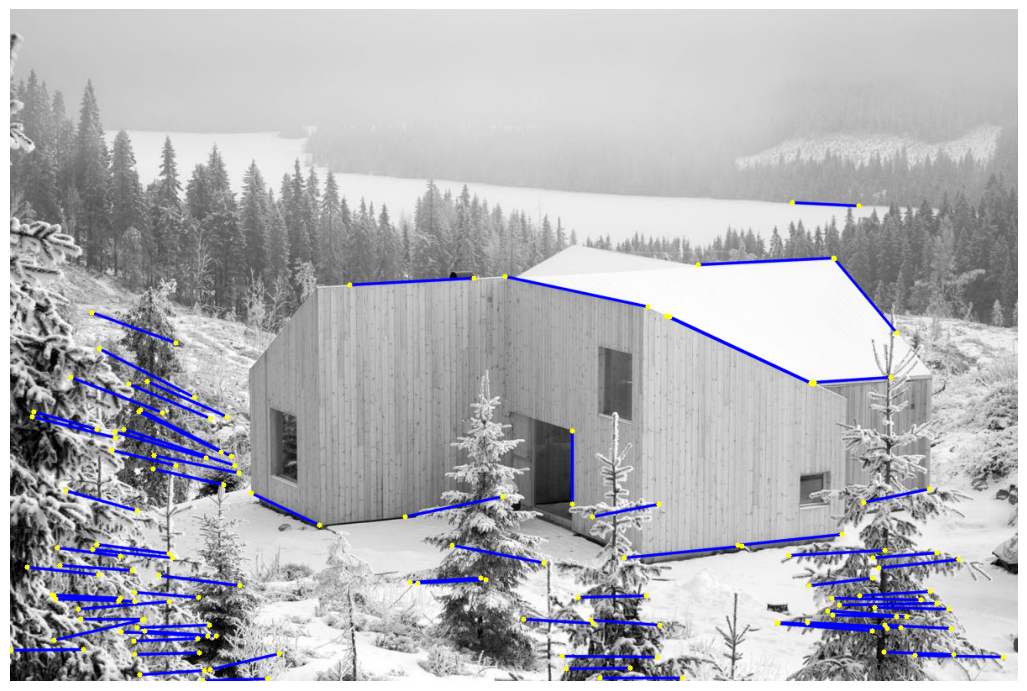

In [92]:
# Display lines
img_out_prob = cv.cvtColor(img, cv.COLOR_GRAY2BGR).copy()
# img_out_prob = np.zeros_like(cv.cvtColor(img, cv.COLOR_GRAY2BGR))
shortest = -1
longest = -1
if lines_prob is not None:
    for i in range(0, len(lines_prob)):
        l = lines_prob[i][0]
        cv.line(img_out_prob, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 2, cv.LINE_AA)
        distance = np.linalg.norm(np.array([l[0] - l[2], l[1] - l[3]]))
        if distance > longest or longest == -1:
            longest = distance
        if distance < shortest or shortest == -1:
            shortest = distance
    for i in range(0, len(lines_prob)):
        l = lines_prob[i][0]
        cv.circle(img_out_prob, (l[0], l[1]), radius=3, color=(0, 255, 255), thickness=-1)
        cv.circle(img_out_prob, (l[2], l[3]), radius=3, color=(0, 255, 255), thickness=-1)
fig = plt.figure(figsize=(13, 9))
plt.imshow(cv.cvtColor(img_out_prob, cv.COLOR_BGR2RGB))
plt.axis('off')

cv.imwrite(img_path + img_name.rpartition('.')[0] + '_lines.jpg', img_out_prob)

In [93]:
print(shortest, longest)

75.0 189.69449122207
